In [30]:
import cell_segmentation as cellseg
import io
import base64
from IPython.display import HTML
from skimage import io as sio
from skimage import exposure, measure
import numpy as np
import os
import matplotlib.pyplot as plt
import ast
import pandas as pd
import seaborn as sns
from skimage.feature import canny
from skimage.filters import sobel
%matplotlib inline


In [31]:
dir_ = "/Users/sarahkeegan/Desktop/"
img1 = sio.imread(dir_ + 'sample_01_09_R3D_D3D_w525_t003.tif')

174
1746


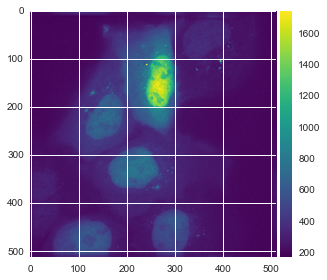

In [32]:
print min(img1.flatten())
print max(img1.flatten())
sio.imshow(img1)

174
1746
19749
65535


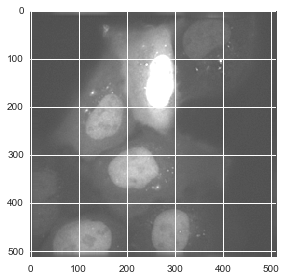

In [59]:
img_rescl = exposure.rescale_intensity(img1, in_range=(0,1055), out_range=(10707,65535))
sio.imshow(img_rescl)
#sio.imsave(dir_ + "/results/img_rescl.tif",img_rescl)
print min(img1.flatten())
print max(img1.flatten())
print min(img_rescl.flatten())
print max(img_rescl.flatten())

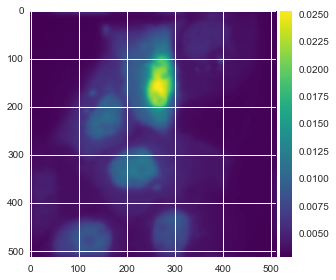

In [60]:
#guassian smooth
from skimage import filters
blur1 = filters.gaussian(img1, sigma=4)
sio.imshow(blur1)

In [63]:
from sklearn.cluster import k_means
pixels = np.expand_dims(img1.flatten(), axis=1)
ret = k_means(pixels, 5)
intensity_cutoffs = sorted(ret[0])
print intensity_cutoffs
print intensity_cutoffs[3][0]

[array([ 230.81766647]), array([ 348.76747975]), array([ 536.16684924]), array([ 716.41810521]), array([ 1368.5943136])]
716.418105206


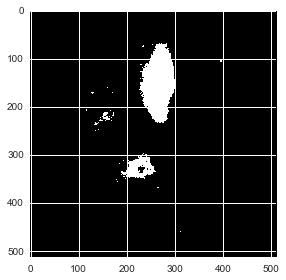

In [65]:
sio.imshow(img1>intensity_cutoffs[3][0])